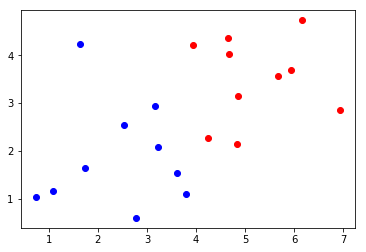

In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

def generate_class_data(numPoints, center_x, center_y, radius):
    training_data = [[center_x+random.uniform(-radius,radius), center_y+random.uniform(-radius,radius)] for x in range(numPoints)]
    return training_data

def plot_data(data_class_a, data_class_b):
    class_a_x = [ x for [x, y] in data_class_a]
    class_a_y = [ y for [x, y] in data_class_a]
    class_b_x = [ x for [x, y] in data_class_b]
    class_b_y = [ y for [x, y] in data_class_b]
    plt.plot(class_a_x, class_a_y, 'ro')
    plt.plot(class_b_x, class_b_y, 'bo')
    plt.show()
    
numPoints = 10
train_data_class_a = generate_class_data(numPoints, 5.0, 3.0, 2.0)
train_data_class_b = generate_class_data(numPoints, 2.0, 2.5, 2.0)
plot_data(train_data_class_a, train_data_class_b)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as func

class LogisticModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LogisticModel,self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)
    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

model = LogisticModel(2, 1)

criterion = torch.nn.BCELoss(reduction='mean')
optimiser = torch.optim.SGD(model.parameters(), lr = 0.05)

train_data = train_data_class_a + train_data_class_b

class_labels = [[[0]] * numPoints][0] + [[[1]] * numPoints][0]

#print(train_data)
#print(class_labels)

x_train = torch.tensor(train_data, dtype=torch.float).reshape(-1,2)
y_train = torch.tensor(class_labels, dtype=torch.float).reshape(-1,1)

epochs = 1000
for epoch in range(epochs):
    inputs = x_train
    labels = y_train
    out = model(inputs)
    optimiser.zero_grad()
    loss = criterion(out, labels)
    loss.backward()
    optimiser.step()
    #predicted = model.forward(x_train)
    if epoch % 100 == 0:
        print('epoch{}, loss {}'.format(epoch, loss.item()))

epoch0, loss 0.5931983590126038
epoch100, loss 0.4988402724266052
epoch200, loss 0.44259992241859436
epoch300, loss 0.40081772208213806
epoch400, loss 0.36792922019958496
epoch500, loss 0.341293603181839
epoch600, loss 0.3192557692527771
epoch700, loss 0.3006916344165802
epoch800, loss 0.28481125831604004
epoch900, loss 0.27104607224464417


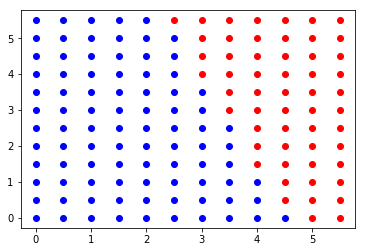

In [3]:
# Generate evaluation data as a grid of points and run it through the model
test_data = []
for xval in range(0, 12):
    for yval in range(0, 12):
        test_data.append([ float(xval * 0.5), float(yval * 0.5)])
results = model(torch.tensor(test_data, dtype=torch.float))
test_class_a = []
test_class_b = []
for point,result in zip(test_data, results.tolist()):
    if result[0] <= 0.5:
        test_class_a.append(point)
    else:
        test_class_b.append(point)
plot_data(test_class_a, test_class_b)